<h1>Neural Networks</h1>

We'll spend the lesson today moving from what I would consider "classical" machine learning towards deep learning. The fundamental building block of deep learning is the neural network. Neural networks can be applied to a wide range of problems -- from tabular data, to image classification, to text processing. In this section we'll introduce the simplest form of neural network and show how to apply it to tabular data.

The basic idea of neural networks is to take a set of inputs $X_1, X_2, ..., X_n$ and create a nonlinear function of them $f(X)$ to predict the response $Y$.

Neural networks have a unique structure where each of the $n$ inputs in the "input layer" feed forward into $k$ hidden nodes in the "hidden layer" which are then combined to give us the output $Y$ in the "output layer". In practice we can introduce as many hidden layers as we need but for this example we will just consider one hidden layer.

Mathematically, we can express this neural network:
$$f(X) = \beta_0 + \sum_{k=1}^K \beta_k h_k(X)$$

where we will call $h_k(X) = A_k$ "activations" defined as
$$A_k = h_k(X) = g w_{k0} + \sum_{j=1}^p w_{kj} X_j$$.

The activation function $A_k$ is decided on ahead of time and can be thought of as describing transformations from node to node within the different layers.

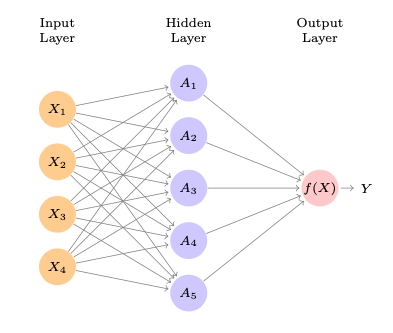

In [1]:
from IPython.display import Image
Image(filename = "onelayernn.png", width=400, height=400)

If we substitute the form of $A_k$ into the above equations we find that we have two parameters specifiying each transformation and so for the image shown above we have 4x5x2+4x1x2=48 paramters.

Historically, people used the sigmoid function for these activations
$$A_k = g(z) = \frac{1}{1+e^{-z}}$$

but more recently the ReLu function has been more widly used
$$A_k = g(z) = \cases{  0, \text{if } z<0,\\
                        z, \text{otherwise}}$$

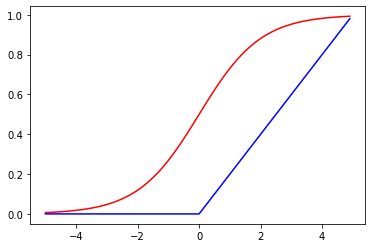

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.1)
def sigmoid(z):
    return 1/(1+np.exp(-z))
def relu(z):
    out = []
    for i in z:
        if i<0:
            out.append(0)
        else:
            out.append(i/5)
    return np.asarray(out)
y1 = sigmoid(x)
y2 = relu(x)
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')
plt.show()

The nonlinear activation is important because it creates interaction terms between our features. This lets us construct arbitrary functions to describe $f$!

Let's see this in practice.

In [3]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

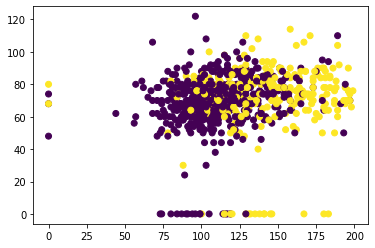

In [4]:
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

We'll use the package Keras to build our neural network. It let's us specify the layers in a familiar object oriented way.

In [5]:
from tensorflow import keras

2022-10-20 15:57:48.297880: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Create the model
model = keras.Sequential()
# Add the hidden layer
model.add(keras.layers.Dense(12, input_shape=(8,), activation='relu'))
#Add the output layer
model.add(keras.layers.Dense(1, input_shape=(12,), activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

2022-10-20 15:58:02.349395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 19.2030 - accuracy: 0.6484
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 3.5857 - accuracy: 0.5846
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.7105 - accuracy: 0.6146
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2422 - accuracy: 0.6081
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9663 - accuracy: 0.6471
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8078 - accuracy: 0.6745
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7182 - accuracy: 0.6641
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.6680
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.6862
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7031
Epoch 11

77/77 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7292
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7240
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5198 - accuracy: 0.7383
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7396
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7370
Epoch 88/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7461
Epoch 89/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7214
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7461
Epoch 91/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7539
Epoch 92/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7344
Epoch 93/150


We can inspect what was happening in these function calls. First, we create one hidden layer with 8 inputs and 12 nodes. We are using the ReLu function for our activation. Next we map these 12 nodes in the hidden layer to one output using a sigmoid function.

We use binary cross-entropy loss and an Adam optimizer. We choose to optimize for largest accuracy. 

What do the arguments "Epochs" and "Batches" mean in this function?

We need to remember back to our lesson on optimization. When we wanted to minimize the loss we needed to update our best guess of model parameters in order to find the minimum of the loss function. The "Batch" size tells us how many rows of data we will use before we update the best guess for our model paramters. The number of "Epochs" tells us how many times we should go through the whole data set before we settle on a set of parameters. 

Iterating through the data in this way let's us run our optimization algorithm a number of times, each time starting from a better initial guess for the parameters.

In [7]:
history.params

{'verbose': 1, 'epochs': 150, 'steps': 77}

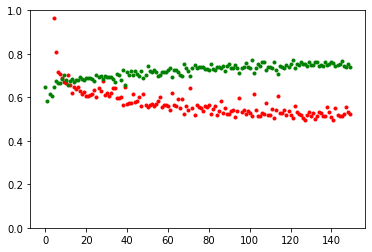

In [8]:
plt.plot(np.arange(150), history.history['loss'], 'r.')
plt.plot(np.arange(150), history.history['accuracy'], 'g.')
plt.ylim([0,1])
plt.show()

We can see that on the training data, the loss decreases as the accuracy increases. We've introduced a new set of hyperparameters though, the number of epochs and batch size. It appears that if we increase the number of epochs we might be able to continue to improve the loss and accuracy. Are there any downsides of trying this?

What happens if we add additional layers to the NN?

In [9]:
# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_shape=(8,), activation='relu'))
model.add(keras.layers.Dense(4, input_shape=(12,), activation='relu'))
model.add(keras.layers.Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model.fit(X, y, epochs=150, batch_size=20)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
39/39 [==============================] - 1s 2ms/step - loss: 18.4976 - accuracy: 0.4076
Epoch 2/150
39/39 [==============================] - 0s 2ms/step - loss: 7.6029 - accuracy: 0.4740
Epoch 3/150
39/39 [==============================] - 0s 2ms/step - loss: 2.3544 - accuracy: 0.5117
Epoch 4/150
39/39 [==============================] - 0s 3ms/step - loss: 1.5129 - accuracy: 0.5625
Epoch 5/150
39/39 [==============================] - 0s 2ms/step - loss: 1.3425 - accuracy: 0.5664
Epoch 6/150
39/39 [==============================] - 0s 2ms/step - loss: 1.1905 - accuracy: 0.5898
Epoch 7/150
39/39 [==============================] - 0s 2ms/step - loss: 1.0873 - accuracy: 0.6003
Epoch 8/150
39/39 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.5990
Epoch 9/150
39/39 [==============================] - 0s 2ms/step - loss: 0.9559 - accuracy: 0.6185
Epoch 10/150
39/39 [==============================] - 0s 3ms/step - loss: 0.9204 - accuracy: 0.6159
Epoch 11

39/39 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6745
Epoch 84/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6745
Epoch 85/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6849
Epoch 86/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6784
Epoch 87/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6823
Epoch 88/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6823
Epoch 89/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6174 - accuracy: 0.6823
Epoch 90/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6810
Epoch 91/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6901
Epoch 92/150
39/39 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6823
Epoch 93/150


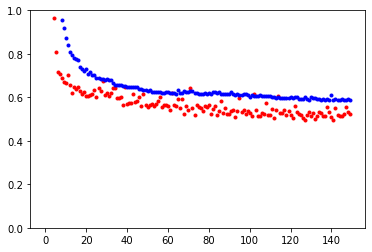

In [10]:
plt.plot(np.arange(150), history.history['loss'], 'r.')
plt.plot(np.arange(150), history1.history['loss'], 'b.')
plt.ylim([0,1])
plt.show()

It looks like by adding another layer we are able to learn "better" from the input data. Do you think we should just add additional layers and we can always improve performance? How do we know how to construct the layers in the neural network? What is the cost of adding more layers?

In [11]:
# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(16, input_shape=(8,), activation='relu'))
model.add(keras.layers.Dense(4, input_shape=(12,), activation='relu'))
model.add(keras.layers.Dense(2, input_shape=(4,), activation='relu'))
model.add(keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model.fit(X, y, epochs=150, batch_size=10)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 3.4194 - accuracy: 0.6432
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5013
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6590 - accuracy: 0.5091
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6172
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6510
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6510
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6510
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6288 - accuracy: 0.6510
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6510
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6262 - accuracy: 0.6510
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6510
Epoch 84/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.6510
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.6510
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6510
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6510
Epoch 88/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.6510
Epoch 89/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6510
Epoch 90/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.6510
Epoch 91/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.6510
Epoch 92/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.6510
Epoch 93/150


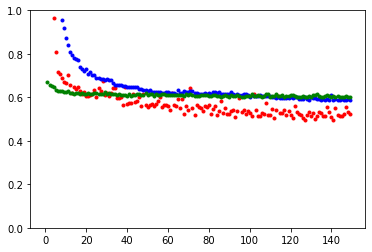

In [12]:
plt.plot(np.arange(150), history.history['loss'], 'r.')
plt.plot(np.arange(150), history1.history['loss'], 'b.')
plt.plot(np.arange(150), history2.history['loss'], 'g.')
plt.ylim([0,1])
plt.show()

It looks like our last NN got "stuck" and couldn't be improved. This may indicate that the extra layer we added created an overdetermined system. We had too many parameters and not enough data points.